# STATSMODELS Linear Regression

# OUTLINE

# Step 1: Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Step 2: Load the Data

In [ ]:
data = pd.read_csv('')

# Creating Dummy Variables

In [ ]:
full_data = data.copy()

In [ ]:
#ex. of creating dummy variables
full_data['Attendance'] = full_data['Attendance'].map({'Yes': 1, 'No': 0})

# Step 3: Explore the Data Statistics

In [ ]:
#data statistics
data.describe()

# Step 4: Define Variables

In [ ]:
#Dependent variable
y = data['']

#Independent variables
x1 = data[['','']]

# Step 5: Explore Relationships

In [ ]:
#plot the variables
plt.scatter(x,y)
plt.xlabel('', fontsize=20)
plt.ylabel('', fontsize=20)
plt.show()

# Transformations

If the relationship is not linear a transformation such as logarithmic transformation may be necessary

Types of Log transformations:

Semi-log model 1
    - log y^ = b0 + b1x1
Interpretation:
    - as x increases by 1 unit, y increases by b1 percent
    
Semi-log model 2
    - y^ = b0 +b1(logx1)
Interpretation:
    - as x increases by 1 percent, y increases by 1 unit
    
Log-Log model
    - log y = b0 + b1(logx1)
Interpretation:
    - as x increases by 1 percent, y increases by b1 percent
    **Elasticity**

In [ ]:
log_x = np.log(x1)
log_y = np.log(y)

In [ ]:
plt.scatter(log_x,log_y)
plt.xlabel('Log X')
plt.ylabel('Log Y')

# Step 6: Run Regression

In [ ]:
#Regression formula is y^ = b0 + b1x1 + e
#For the intercept we need to set a constant of 1 because y^ = b0 * 1 + b1x1 + e
#Therefor we add this 
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

# Step 7: Analyze Results

In [ ]:
results.summary()

# Step 8: Make Predictions

In [ ]:
#all predictions
prediction = results.predict(x)
prediction.head()

In [ ]:
#individual predictions
results.predict([])

# Create a DataFrame

In [ ]:
predictions_df = pd.DataFrame({'Prediction': prediction})
joined = x.join(predictions_df)
joined.head()

# Export the DataFrame for further analysis

In [ ]:
joined.to_csv('location you want to store file\\file_name.csv', index = False, header=True)

# PRACTICAL EXAMPLE - Home Prices

# Step 1: Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

C:\Users\feder\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Step 2: Load the Data

In [4]:
data = pd.read_csv('C:\\Users\\feder\\Downloads\\real_estate_price_size_year.csv')

# Step 3: Explore the Data Statistics

In [5]:
#data statistics
data.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


# Step 4: Define Variables

In [6]:
#Dependent variable
y = data['price']

In [7]:
#Independent variables
x1 = data[['size','year']]
year = data['year']
size = data['size']

# Step 5: Explore Relationships

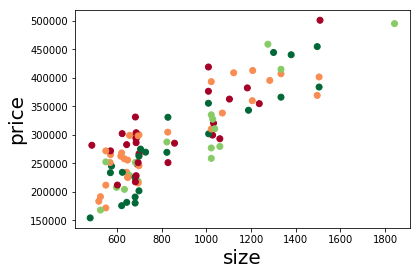

In [8]:
#plot the variables
plt.scatter(size,y, c=data['year'], cmap='RdYlGn_r')
plt.xlabel('size', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.show()

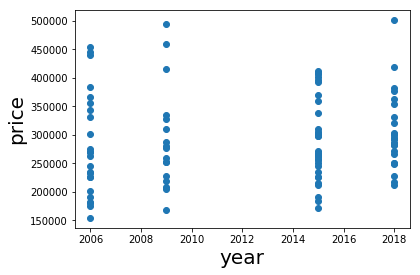

In [19]:
#plot the variables
plt.scatter(year,y)
plt.xlabel('year', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.show()

# Step 6: Run Regression

In [10]:
#Regression formula is y^ = b0 + b1x1 + e
#For the intercept we need to set a constant of 1 because y^ = b0 * 1 + b1x1 + e
#Therefor we add this 
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

# Step 7: Analyze Results

In [11]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     168.5
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           2.77e-32
Time:                        21:14:50   Log-Likelihood:                -1191.7
No. Observations:                 100   AIC:                             2389.
Df Residuals:                      97   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.772e+06   1.58e+06     -3.647      0.000   -8.91e+06   -2.63e+06
size         227.7009     12.474     18.254      0.000     202.943     252.458
year        2916.7853    785.896      3.711      0.000    1357.000    4476.571
==============================================================================
Omnibus:                       10.083   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.678
Skew:                           0.095   Prob(JB):                        0.159
Kurtosis:                       2.080   Cond. No.                     9.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpretation:

price = 227.70(size) + 2916.79(year) - 5772000 
    
const - irrelevant here becuase home has no price when size and year are 0

size coef - a 1 sq. ft. increase in the size of the house corresponds to a $227.70 increase in price

year coef - a 1 year increase in the year the house was built corresponds to a $2,916.79 increase in price

T-stat and P-value (P>|t|) - Hypothesis test of b0 = 0 or b1 = 0 aka is the coefficient equal to 0?
                           - p-value < 0.05 means coef is significant (it is most probably different from 0)

R-squared - the model explains 77.6% of the variability in the data
Adj. R-squared - the model does not penalize the addition of another variable much

Prob(F-statistic) - tests overall significance of the model (aka is at least one coef != 0)
                  - lower F-stat means closer to non-significant model (higher F-stat = better)

# Step 8: Make Predictions

In [13]:
x.head()

,const,size,year
0,1.0,643.09,2015
1,1.0,656.22,2009
2,1.0,487.29,2018
3,1.0,1504.75,2015
4,1.0,1275.46,2009


In [30]:
prediction = results.predict(x)
prediction.head()

0    251487.558319
1    236976.558571
2    224762.121245
3    447688.276183
4    377978.035407
dtype: float64

# Predicting the price of an individual house

In [27]:
results.predict([1,500,2000])

array([175154.06321654])

# Creating a Dataframe of all the model's predictions

In [29]:
predictions_df = pd.DataFrame({'Prediction': prediction})
joined = x.join(predictions_df)
joined.head()

,const,size,year,Prediction
0,1.0,643.09,2015,251487.558319
1,1.0,656.22,2009,236976.558571
2,1.0,487.29,2018,224762.121245
3,1.0,1504.75,2015,447688.276183
4,1.0,1275.46,2009,377978.035407


# Export df as a CSV file to continue analysis in Tableau

In [36]:
joined.to_csv('C:\\Users\\feder\\OneDrive\\Desktop\\Co-op prep\\regression_predictions.csv', index = False, header=True)